<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>ASSIGNMENT 5 - CLUSTERING</b></u>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>The Iris dataset contains various features related to flower measurements, including characteristics such as sepal length, sepal width, petal length, and petal width, along with a target variable indicating the species of the flower. The primary goal of this project is to design and implement a comprehensive clustering system that addresses key challenges in unsupervised learning, such as feature scaling, cluster formation, and model evaluation. By applying effective clustering algorithms, the objective is to group the flowers into distinct clusters based on the provided features, ultimately enhancing the overall quality, interpretability, and usability of the model for further analysis and machine learning applications. This task will focus on implementing and comparing multiple clustering techniques to determine the best model for grouping the Iris flowers into species-like clusters. </p>    
</div>

<div style="text-align: LEFT; font-size: 20px; color: red;">
    <u><b>SOURCE</b></u>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>The Iris dataset used for this project is available in the `sklearn` library and can be loaded using the `load_iris()` function from `sklearn.datasets`.</p>
</div>

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>IMPORTING MODULES</b></u>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>LOADING & PREPROCESSING</b></u>
</div>

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>1. LOAD THE DATA AND CONVERT INTO DATA FRAME</b>
</div>

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>2. DISPLAY FIRST & LAST ROWS</b>
</div>

In [6]:
# DISPLAY FIRST FEW ROWS TO UNDERSTAND THE STRUCTURE OF THE DATA
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [8]:
# DISPLAY LAST FEW ROWS TO UNDERSTAND THE STRUCTURE OF THE DATA
print(iris_df.tail())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>3. DATATYPE OF EACH COLUMN</b>
</div>

In [10]:
# DISPLAY DATA TYPE OF EACH COLUMN
print("Dataset Info:")
iris_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>4. STATISTICAL SUMMARY OF DATA</b>
</div>

In [12]:
# DISPLAY STATISTICAL SUMMARY 
print("Statistical Summary:")
iris_df.describe()

Statistical Summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>5. DISPLAY ALL COLUMN NAMES</b>
</div>

In [14]:
# DISPLAY PARTICULAR COLUMN
print("Columns of the dataset:")
iris_df.columns

Columns of the dataset:


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>6. NULL / MISSING VALUES IN EACH COLUMN</b>
</div>

In [16]:
# DISPLAY NULL VALUES IN EACH COLUMN
print("Null values in each column:")
print(iris_df.isnull().sum())

Null values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


<div style="text-align: left; font-size: 24px; color: violet;">
    <b>7. DUPLICATE VALUES</b>
</div>

In [18]:
# FINDING THE TOTAL NO OF DUPLICATES
iris_df.duplicated().sum()

1

In [20]:
iris_df.shape

(150, 4)

In [22]:
iris_df.drop_duplicates(inplace=True)

In [24]:
iris_df.shape

(149, 4)

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>8. FEATURE SCALING</b>
</div>

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df)

iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.feature_names)

print(iris_scaled_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.898033          1.012401          -1.333255         -1.308624
1          -1.139562         -0.137353          -1.333255         -1.308624
2          -1.381091          0.322549          -1.390014         -1.308624
3          -1.501855          0.092598          -1.276496         -1.308624
4          -1.018798          1.242352          -1.333255         -1.308624


<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p><b><u>Preprocessing steps with explanations:</u></b>

1. *Load the Data*: 
   - The dataset is loaded using load_iris() from sklearn.datasets. This provides the feature data (X), which contains information about the sepal and petal dimensions of the flowers.

2. *Convert to DataFrame*: 
   - The data is converted into a pandas DataFrame for easier manipulation and analysis. The features are represented by the columns: "sepal length", "sepal width", "petal length", and "petal width".

3. *Display First and Last Rows*: 
   - Displayed the first few rows to understand the data structure and confirm it loaded correctly.

4. *Check Data Types*: 
   - Used `info()` to check the data types of the columns and ensure they are as expected (numerical values).

5. *Statistical Summary*: 
   - Used `describe()` to view statistics (mean, min, max, etc.) of both features and target to understand their distribution.

6. *Display Column Names*: 
   - Printed the column names of the features to know what variables we are working with.

7. *Check for Missing Values*: 
   - Checked for missing values with `isnull().sum()` to ensure the dataset is complete.

8. *Find Duplicate Rows*: 
   - Checked for duplicate rows using `duplicated().sum()` to ensure there are no repeated records.

9. *Feature Scaling*: 
   - Scaled the features using `StandardScaler` to ensure that all features are on the same scale, which is important for some machine learning models.

These steps are necessary to clean and prepare the data for better model performance.</p>
</div>

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>CLUSTERING ALGORITHMS IMPLEMENTATION</b></u>
</div>

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>1. KMEANS CLUSTERING ALGORITHM</b>
</div>

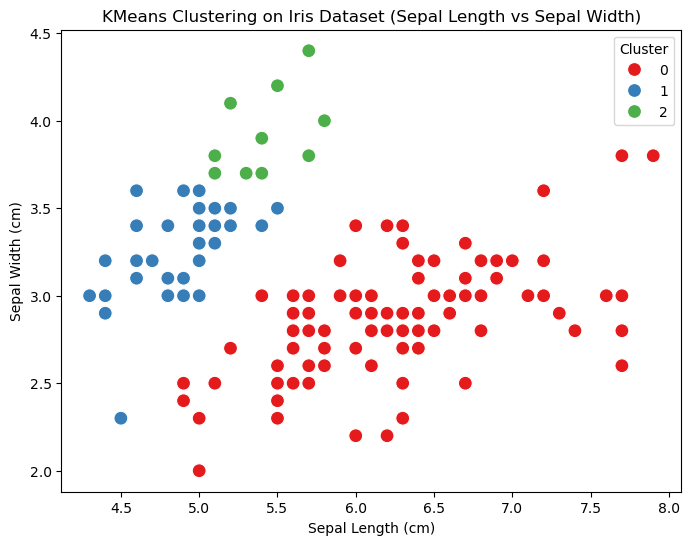

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  
iris_df['Cluster'] = kmeans.fit_predict(iris_scaled)

# Visualization 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['Cluster'], palette="Set1", s=100, marker='o')
plt.title('KMeans Clustering on Iris Dataset (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Cluster')
plt.show()

In [35]:
# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

Cluster Centers (Centroids):
[[ 0.51088483 -0.42769521  0.65558826  0.63035457]
 [-1.16567346  0.45927607 -1.31024484 -1.26595273]
 [-0.57289843  1.94989313 -1.26339836 -1.19729626]]


<div style="text-align: left; font-size: 22px; color: white;">
    <p>KMeans is a popular unsupervised machine learning algorithm used for clustering. The goal of KMeans is to partition the dataset into k clusters, where each data point belongs to the cluster with the nearest mean. 
The algorithm works by iterating through the following steps:
        
1) <b>Initialization:</b> Choose k initial centroids randomly from the dataset.
2) <b>Assignment:</b> Assign each data point to the nearest centroid.
3) <b>Update:</b> Recalculate the centroids by taking the mean of the points in each cluster.
4) <b>Repeat:</b> Repeat steps 2 and 3 until the centroids no longer change (convergence is reached).
    </p>
 </div>       
        

<div style="text-align: left; font-size: 22px; color: purple;">
    <p><b>Why KMeans is Suitable for the Iris Dataset:</b></p>
<div style="text-align: left; font-size: 22px; color: white;">
<P>The Iris dataset contains numerical features (sepal and petal measurements) which are suitable for KMeans since the algorithm relies on measuring the distance between data points (typically using Euclidean distance).
KMeans can effectively identify clusters in the data, and since the Iris dataset contains 3 species (which can be considered as 3 distinct clusters), KMeans can help in grouping the data into these 3 clusters.
The structure of the Iris dataset is relatively simple, and KMeans can efficiently find the clusters in the 4-dimensional feature space (after scaling).</p>
 </div>       
        

<div style="text-align: left; font-size: 24px; color: violet;">
    <b>2. HIERARCHICAL CLUSTERING ALGORITHM</b>
</div>

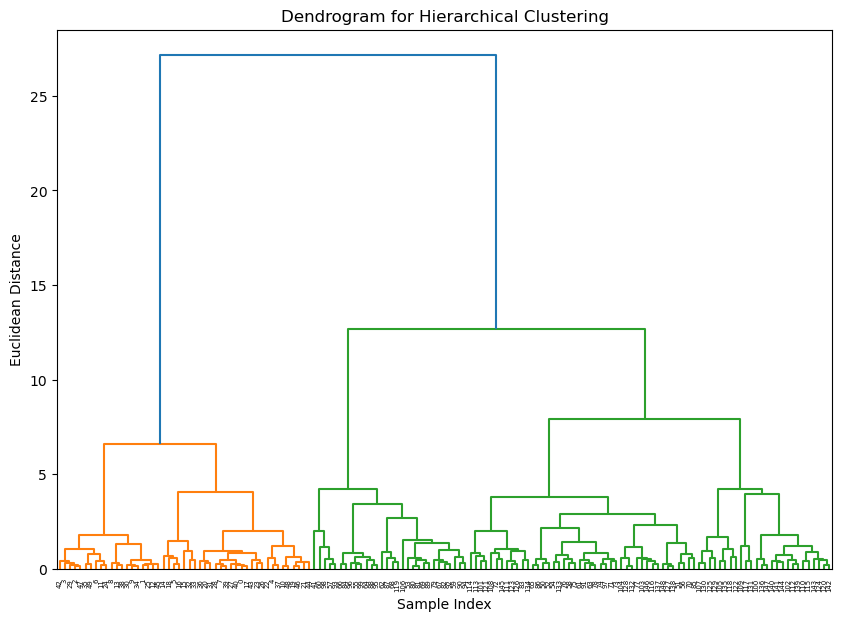

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Create the linkage matrix (Agglomerative Clustering)
Z = linkage(iris_scaled, method='ward')  

# Plot the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()


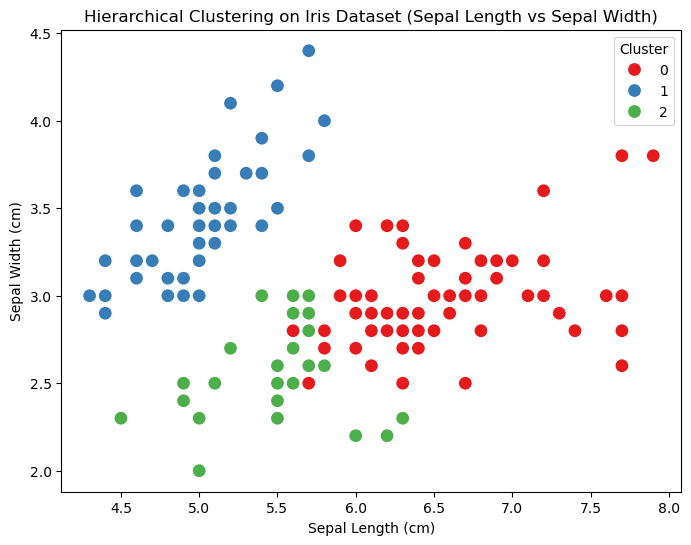

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering 
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
iris_df['Cluster'] = hierarchical.fit_predict(iris_scaled)

# Visualization of the clusters 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['Cluster'], palette="Set1", s=100, marker='o')
plt.title('Hierarchical Clustering on Iris Dataset (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Cluster')
plt.show()

<div style="text-align: left; font-size: 22px; color: white;">
    <p>Hierarchical clustering is another unsupervised machine learning algorithm used for clustering. Unlike KMeans, which requires the number of clusters to be predefined, hierarchical clustering builds a hierarchy of clusters in a tree-like structure called a dendrogram. There are two main types of hierarchical clustering:</p>

<p><b>1. Agglomerative (Bottom-up approach):</b>

        * Initially, each data point is treated as a separate cluster.
        
        * Then, it repeatedly merges the closest clusters until all points are grouped into a single cluster.
        
        * The process of merging clusters is based on a distance metric, typically Euclidean distance, and the linkage criterion (e.g., single, complete, average).
</p>

<p><b>2. Divisive (Top-down approach):</b>
    
        * It starts with all data points in a single cluster and recursively splits the cluster into smaller sub-clusters.
</P>
</div>

<div style="text-align: left; font-size: 22px; color: purple;">
    <p><b>Why Hierarchical Clustering is Suitable for the Iris Dataset:</b></p>
<div style="text-align: left; font-size: 22px; color: white;">
<P>
    
    * Hierarchical clustering is well-suited for the Iris dataset because it does not require the number of clusters to be predefined, which can be advantageous if you don't know how many clusters exist.
    
    * The Iris dataset has a natural grouping of the data points into three species, making it a good candidate for hierarchical clustering.
    
    * Visualizing the dendrogram can provide valuable insights into the similarity between the different clusters and can help in determining the optimal number of clusters.
    
    * Hierarchical clustering can also provide more flexibility in terms of the granularity of clusters compared to KMeans.</p>
 </div>       
        

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>MODEL EVALUATION</b></u>
</div>

In [63]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for KMeans and Hierarchical Clustering
kmeans_score = silhouette_score(iris_scaled, kmeans.labels_)
hierarchical_score = silhouette_score(iris_scaled, hierarchical.labels_)

print(f"Silhouette Score for KMeans: {kmeans_score:.4f}")
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_score:.4f}")


Silhouette Score for KMeans: 0.4939
Silhouette Score for Hierarchical Clustering: 0.4498


<div style="text-align: center; font-size: 28px; color: purple;">
    <b>Summary of Models</b>
</div>

<div style="text-align: left; font-size: 22px; color: white;">
    <p><u>KMeans with a score of 0.4939:</u></p>

<P>This score suggests that KMeans has done a reasonable job at clustering the data, with clusters that are fairly well-separated. While it's not extremely high, it's still a decent score, indicating that the clusters formed are somewhat distinct but may not be perfectly optimized.</P>

<P><u>Hierarchical Clustering with a score of 0.4498:</u></P>

<P>This score is slightly lower than KMeans, suggesting that the clusters identified by hierarchical clustering are a bit less well-defined. It indicates that while the hierarchical algorithm has captured some structure, the separation between clusters may not be as clear as in KMeans.</p>
</div>

<div style="text-align: center; font-size: 36px; color: red;">
    <u><b>CONCLUSION </b></u>
</div>

<div style="text-align: left; font-size: 22px; color: white;">
    <p>
KMeans appears to perform slightly better in terms of the Silhouette Score, which indicates that the clustering result for KMeans has better separation and cohesion among the clusters compared to Hierarchical Clustering.</p>
<p>Hierarchical Clustering's score is not significantly worse, so it could still be a reasonable choice depending on other factors like interpretability, flexibility (since hierarchical clustering can produce different granularities of clustering), and the dendrogram visualization.</p>
</div>